# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Pranav Mehrotra`

Roll Number: `20CS10085`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn as nn
import random
import numpy as np

from torchvision import datasets, transforms 
from torch.utils.data import random_split, DataLoader

## Add any other imports here
import matplotlib.pyplot as plt

In [2]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition 
input_layer = 784 # 28x28
hidden_layer_1 = 64
hidden_layer_2 = 128
output_layer = 10


# Fill in appropriately while maintaining the name of the variable
modelA = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.ReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.ReLU(),
    nn.Linear(hidden_layer_2, output_layer)   
)

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton
input_layer = 784 # 28x28
hidden_layer_1 = 64
hidden_layer_2 = 128
hidden_layer_3 = 256
output_layer = 10


# Use the same variable name
modelB = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.ReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.ReLU(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.ReLU(),
    nn.Linear(hidden_layer_3, output_layer)  
)

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definiton
input_layer = 784 # 28x28
hidden_layer_1 = 64
hidden_layer_2 = 128
hidden_layer_3 = 256
hidden_layer_4 = 512
output_layer = 10



# Use the same variable name
modelC = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.ReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.ReLU(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.ReLU(),
    nn.Linear(hidden_layer_3, hidden_layer_4),
    nn.ReLU(),
    nn.Linear(hidden_layer_4, output_layer)
    
)

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [7]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
def get_adam_optimizer(model, learning_rate=0.01):
    return torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all themodels. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [8]:
# Define the hyperparameters (same for all 3 models) here
learning_rate = 0.01
number_of_epochs = 15

Model A 



In [9]:
# Function to calculate accuracy
def calc_accuracy(batch_data, model, dataset):
  with torch.no_grad():
    num_corerct = 0 # Initialize number of correct matches
    for i, (image_data, correct_label) in enumerate(batch_data):  # Iterate over the dataset
      image_data, correct_label = image_data.to(device), correct_label.to(device) # Move to device
      img = image_data.reshape(image_data.shape[0], -1) # Flatten image
      preds = model(img) # Apply the model
      _, pred_val = torch.max(preds, dim=1)  # Get the maximum prediction value
      num_corerct += torch.sum(pred_val == correct_label).item() # Update number of corerct matches
    return (100 * num_corerct / len(dataset)) # Return Accuracy

def train_model(model,device):
  optimizer = get_adam_optimizer(model, learning_rate)

  # Lists to store the loss and accuracy of the model
  epoch_losses = []
  validation_losses = []
  epoch_accuracies = []
  validation_accuracies = []

  for epoch in range(number_of_epochs):
      loss_epoch = 0
      for i, (image_data, correct_labels) in enumerate(train_loader):
          image_data, correct_labels = image_data.to(device), correct_labels.to(device)

          # Clear gradients w.r.t. parameters
          optimizer.zero_grad()

          # Flatten image
          img = image_data.reshape(image_data.shape[0], -1)

          # Forward pass to get output
          outputs = model(img)

          # Calculate Loss: cross entropy loss
          loss = criterion(outputs, correct_labels)

          # Calculating gradients for parameters
          loss.backward()
          loss_epoch += loss.item()

          # Updating parameters in the optimizer in one step
          optimizer.step()

      # Append the Training loss and accuracy after every epoch
      epoch_accuracies.append(calc_accuracy(train_loader, model, train))
      epoch_losses.append(loss_epoch / len(train_loader))
    
      # Intialising Validation loss
      loss_epoch_val = 0

      # Disabling gradient calculation for validation
      with torch.no_grad():
        for i, (image_data, correct_labels) in enumerate(val_loader):
            # Move to device
            image_data, correct_labels = image_data.to(device), correct_labels.to(device)
            # Flatten image
            img = image_data.reshape(image_data.shape[0], -1)
          
            # Forward pass only to get output
            predictions = model(img)
            loss = criterion(predictions, correct_labels) # Calculate Validation loss
            loss_epoch_val += loss.item() # Update Validation loss

        # Append the Validation loss and accuracy after every epoch  
        validation_losses.append(loss_epoch_val / len(val_loader))
        validation_accuracies.append(calc_accuracy(val_loader, model, val))
      
      print(f"Iteration no.: {epoch:3}. Training Set Loss: {epoch_losses[-1]:.4f},  Validation Set Loss: {validation_losses[-1]:.4f}")
      print(f"Iteration no.: {epoch:3}. Training Set Accuracy: {epoch_accuracies[-1]:.4f},  Validation Set Accuracy: {validation_accuracies[-1]:.4f}")
      print("---------------------------------------------------------------------------------")
  return epoch_losses, validation_losses, epoch_accuracies, validation_accuracies
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #train on cuda if available
print(device)

# import time
# start = time.time()
model = modelA
model.to(device)
epoch_losses, validation_losses, epoch_accuracies, validation_accuracies = train_model(model,device)
# end = time.time()
# print(f"Training took {end-start} seconds for {number_of_epochs} epochs")

cuda:0
Iteration no.:   0. Training Set Loss: 0.2687,  Validation Set Loss: 0.1760
Iteration no.:   0. Training Set Accuracy: 95.9000,  Validation Set Accuracy: 95.1000
---------------------------------------------------------------------------------
Iteration no.:   1. Training Set Loss: 0.1584,  Validation Set Loss: 0.1744
Iteration no.:   1. Training Set Accuracy: 96.4000,  Validation Set Accuracy: 95.4500
---------------------------------------------------------------------------------
Iteration no.:   2. Training Set Loss: 0.1317,  Validation Set Loss: 0.1521
Iteration no.:   2. Training Set Accuracy: 96.8580,  Validation Set Accuracy: 96.0100
---------------------------------------------------------------------------------
Iteration no.:   3. Training Set Loss: 0.1204,  Validation Set Loss: 0.1733
Iteration no.:   3. Training Set Accuracy: 97.4720,  Validation Set Accuracy: 96.1500
---------------------------------------------------------------------------------
Iteration no.:   

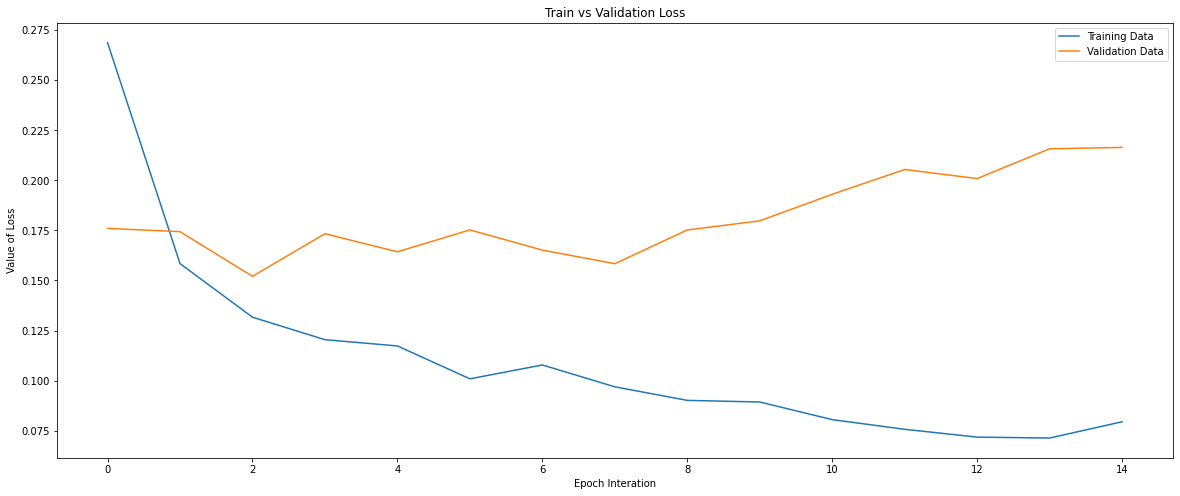

In [10]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses)
plt.plot(validation_losses)
plt.xlabel('Epoch Interation')
plt.ylabel('Value of Loss')
plt.legend(['Training Data','Validation Data'])
plt.title('Train vs Validation Loss')
plt.show()

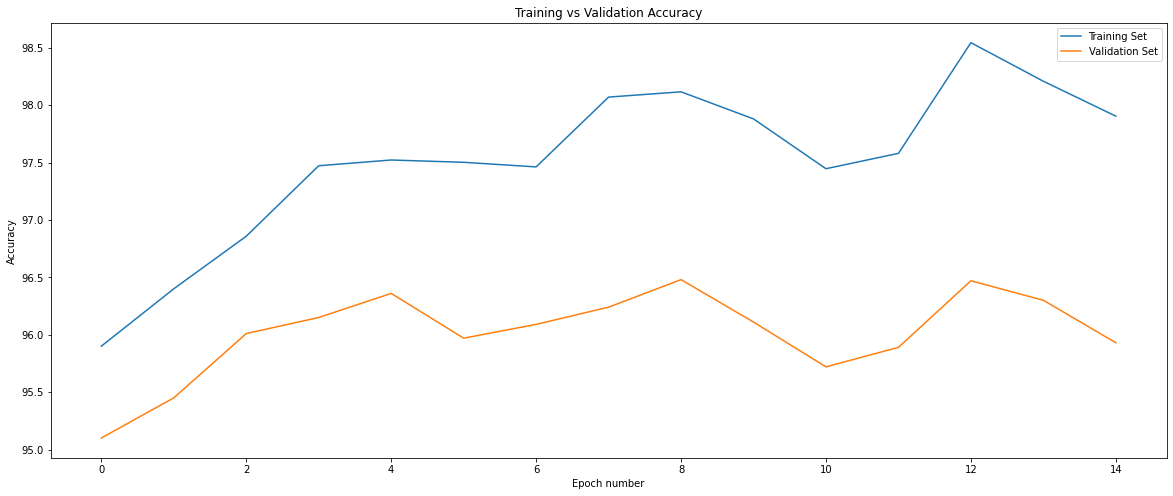

In [11]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_accuracies)
plt.plot(validation_accuracies)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_A = validation_accuracies[-1] # Store the Validation accuracy of last iteration of model A

### Model B


In [12]:
#training loop of model B
model = modelB
model.to(device)
epoch_losses, validation_losses, epoch_accuracies, validation_accuracies = train_model(model,device)

Iteration no.:   0. Training Set Loss: 0.3222,  Validation Set Loss: 0.3547
Iteration no.:   0. Training Set Accuracy: 90.9840,  Validation Set Accuracy: 90.2400
---------------------------------------------------------------------------------
Iteration no.:   1. Training Set Loss: 0.1955,  Validation Set Loss: 0.1933
Iteration no.:   1. Training Set Accuracy: 95.6940,  Validation Set Accuracy: 95.1000
---------------------------------------------------------------------------------
Iteration no.:   2. Training Set Loss: 0.1684,  Validation Set Loss: 0.1966
Iteration no.:   2. Training Set Accuracy: 95.6500,  Validation Set Accuracy: 94.6800
---------------------------------------------------------------------------------
Iteration no.:   3. Training Set Loss: 0.1430,  Validation Set Loss: 0.1822
Iteration no.:   3. Training Set Accuracy: 96.8720,  Validation Set Accuracy: 95.5200
---------------------------------------------------------------------------------
Iteration no.:   4. Trai

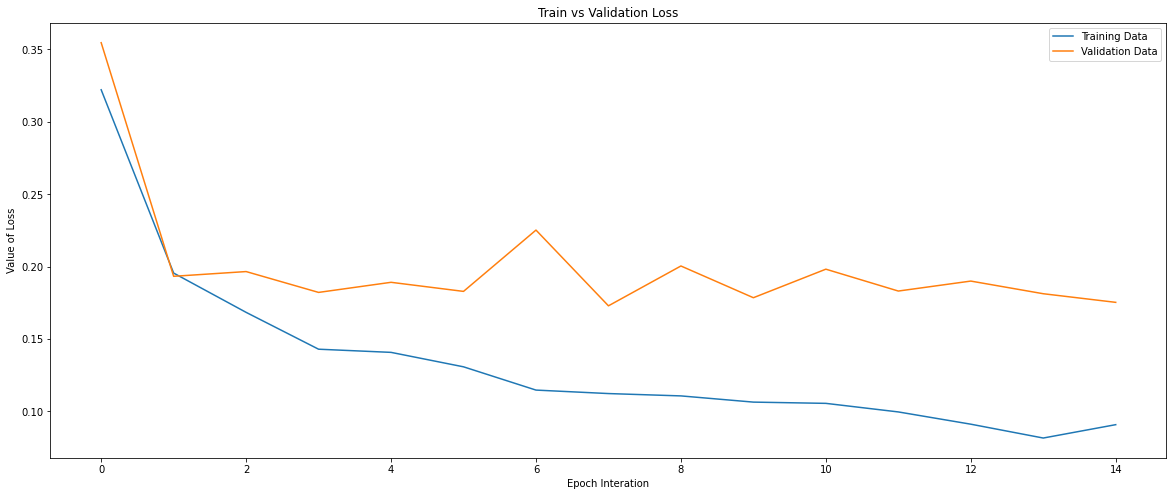

In [13]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses)
plt.plot(validation_losses)
plt.xlabel('Epoch Interation')
plt.ylabel('Value of Loss')
plt.legend(['Training Data','Validation Data'])
plt.title('Train vs Validation Loss')
plt.show()

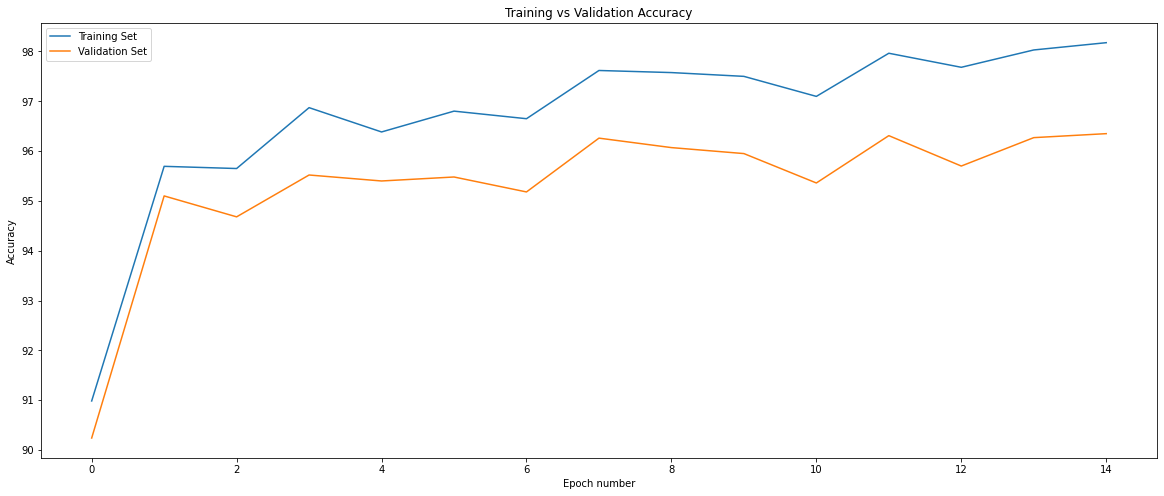

In [14]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_accuracies)
plt.plot(validation_accuracies)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_B = validation_accuracies[-1] # Store the Validation accuracy of last iteration of model B

### Model C


In [15]:
#training loop of model C
model = modelC
model.to(device)
epoch_losses, validation_losses, epoch_accuracies, validation_accuracies = train_model(model,device)

Iteration no.:   0. Training Set Loss: 0.3799,  Validation Set Loss: 0.2709
Iteration no.:   0. Training Set Accuracy: 94.1000,  Validation Set Accuracy: 93.3200
---------------------------------------------------------------------------------
Iteration no.:   1. Training Set Loss: 0.2426,  Validation Set Loss: 0.3225
Iteration no.:   1. Training Set Accuracy: 94.3480,  Validation Set Accuracy: 93.3100
---------------------------------------------------------------------------------
Iteration no.:   2. Training Set Loss: 0.2084,  Validation Set Loss: 0.2105
Iteration no.:   2. Training Set Accuracy: 96.0320,  Validation Set Accuracy: 94.5700
---------------------------------------------------------------------------------
Iteration no.:   3. Training Set Loss: 0.1827,  Validation Set Loss: 0.2125
Iteration no.:   3. Training Set Accuracy: 95.6340,  Validation Set Accuracy: 94.3700
---------------------------------------------------------------------------------
Iteration no.:   4. Trai

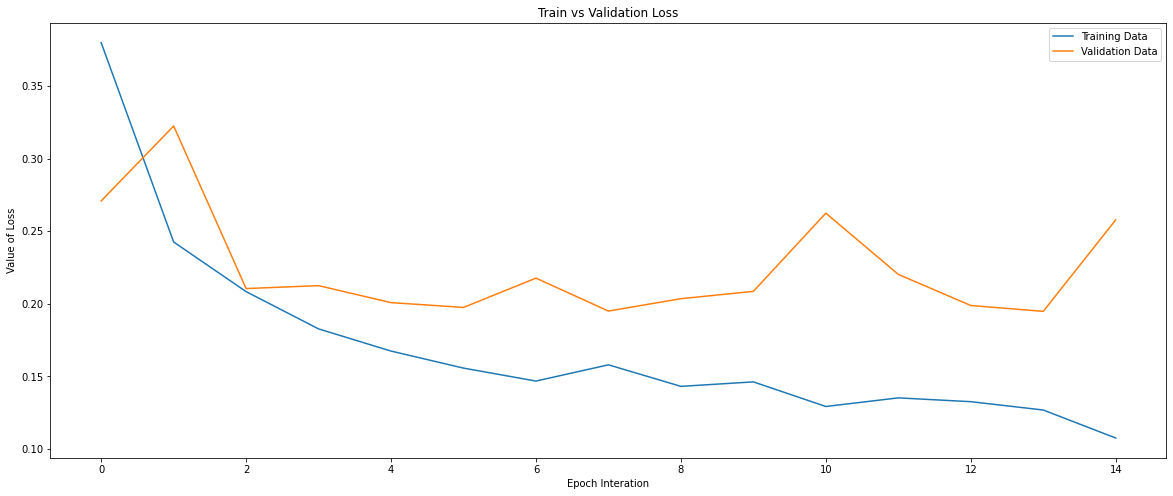

In [16]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses)
plt.plot(validation_losses)
plt.xlabel('Epoch Interation')
plt.ylabel('Value of Loss')
plt.legend(['Training Data','Validation Data'])
plt.title('Train vs Validation Loss')
plt.show()

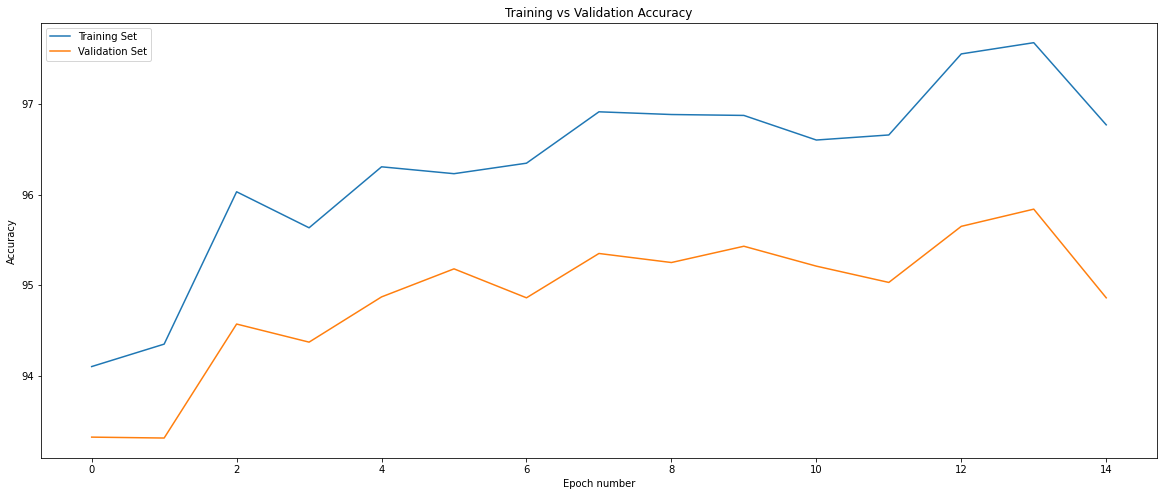

In [17]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_accuracies)
plt.plot(validation_accuracies)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_C = validation_accuracies[-1] # Store the Validation accuracy of last iteration of model C

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [18]:
acc = [acc_A, acc_B, acc_C]
mod = [modelA, modelB, modelC]
max_value = max(acc)
model_relu = mod[acc.index(max_value)]
input_layer = 784 # 28x28
hidden_layer_1 = 64
hidden_layer_2 = 128
hidden_layer_3 = 256
hidden_layer_4 = 512
output_layer = 10

# Leaky ReLU model definiton

# Tanh model definition


# Maintain these variable names
if model_relu== modelA:
  model_lrelu = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_2, output_layer)
    )
  model_tanh = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.Tanh(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.Tanh(),
    nn.Linear(hidden_layer_2, output_layer)
  )
elif model_relu==modelB:
  model_lrelu = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_3, output_layer)
  )
  model_tanh = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.Tanh(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.Tanh(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.Tanh(),
    nn.Linear(hidden_layer_3, output_layer)
  )
else:
  model_lrelu = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_3, hidden_layer_4),
    nn.LeakyReLU(),
    nn.Linear(hidden_layer_4, output_layer)
  )
  model_tanh = nn.Sequential(
    nn.Linear(input_layer, hidden_layer_1),
    nn.Tanh(),
    nn.Linear(hidden_layer_1, hidden_layer_2),
    nn.Tanh(),
    nn.Linear(hidden_layer_2, hidden_layer_3),
    nn.Tanh(),
    nn.Linear(hidden_layer_3, hidden_layer_4),
    nn.Tanh(),
    nn.Linear(hidden_layer_4, output_layer)
)
print(model_lrelu)
print(model_tanh)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=256, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=256, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=256, bias=True)
  (5): Tanh()
  (6): Linear(in_features=256, out_features=10, bias=True)
)


### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [19]:
# Training Loop for LRELU
model = model_lrelu
model.to(device)
epoch_losses, validation_losses, epoch_accuracies, validation_accuracies = train_model(model,device)

Iteration no.:   0. Training Set Loss: 0.3124,  Validation Set Loss: 0.2631
Iteration no.:   0. Training Set Accuracy: 93.8020,  Validation Set Accuracy: 92.5100
---------------------------------------------------------------------------------
Iteration no.:   1. Training Set Loss: 0.2008,  Validation Set Loss: 0.1943
Iteration no.:   1. Training Set Accuracy: 95.8420,  Validation Set Accuracy: 94.8500
---------------------------------------------------------------------------------
Iteration no.:   2. Training Set Loss: 0.1759,  Validation Set Loss: 0.2328
Iteration no.:   2. Training Set Accuracy: 95.7700,  Validation Set Accuracy: 94.7100
---------------------------------------------------------------------------------
Iteration no.:   3. Training Set Loss: 0.1599,  Validation Set Loss: 0.2138
Iteration no.:   3. Training Set Accuracy: 96.2860,  Validation Set Accuracy: 95.1600
---------------------------------------------------------------------------------
Iteration no.:   4. Trai

In [20]:
# Training Loop for TanH
model = model_tanh
model.to(device)
epoch_losses, validation_losses, epoch_accuracies, validation_accuracies = train_model(model,device)

Iteration no.:   0. Training Set Loss: 0.3809,  Validation Set Loss: 0.3106
Iteration no.:   0. Training Set Accuracy: 91.7980,  Validation Set Accuracy: 91.0100
---------------------------------------------------------------------------------
Iteration no.:   1. Training Set Loss: 0.2716,  Validation Set Loss: 0.3376
Iteration no.:   1. Training Set Accuracy: 92.0940,  Validation Set Accuracy: 91.1200
---------------------------------------------------------------------------------
Iteration no.:   2. Training Set Loss: 0.2967,  Validation Set Loss: 0.2738
Iteration no.:   2. Training Set Accuracy: 93.0980,  Validation Set Accuracy: 92.2600
---------------------------------------------------------------------------------
Iteration no.:   3. Training Set Loss: 0.2859,  Validation Set Loss: 0.2761
Iteration no.:   3. Training Set Accuracy: 93.7380,  Validation Set Accuracy: 92.8200
---------------------------------------------------------------------------------
Iteration no.:   4. Trai

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [21]:
# Define how to calculate Accuracy on Test Set
def calc_test_set_accuracy(model):
  model.to(device)
  accuracy_test = calc_accuracy(test_loader, model, test_data)
  print(f"Test Set Accuracy: {accuracy_test:.4f}")

In [22]:
# Accuracy of RELU model
calc_test_set_accuracy(model=model_relu)

Test Set Accuracy: 96.7300


In [23]:
# Accuracy of TanH model
calc_test_set_accuracy(model = model_tanh)

Test Set Accuracy: 91.7900


In [24]:
# Accuracy of LeakyReLU model
calc_test_set_accuracy(model = model_lrelu)

Test Set Accuracy: 94.6200


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `96.7300` %
* TanH model Test Set Accuracy: `91.7900` %
* LeakReLU model Test Set Accuracy: `94.6200` %